In [261]:
#House prices analysis

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [263]:
df_1 = pd.read_csv("otodom advertisements all from poznan1.csv")
df_1


,price,price per m,area,location
0,980000.0,5765,170.0,Poznań Jeżyce Smochowice
1,6450000.0,13665,472.0,Poznań Jeżyce Sołacz
2,429000.0,8218,52.2,Suchy Las poznański wielkopolskie
3,549000.0,5490,100.0,Rokietnica wielkopolskie
4,1500000.0,559701,268.0,Poznań wielkopolskie
...,...,...,...,...
2529,1700000.0,6800,250.0,Gniezno wielkopolskie
2530,6500000.0,11818,550.0,Poznań Stare Miasto Centrum rynek Stary Rynek
2531,4900000.0,4016,1220.0,Poznań Stare Miasto Centrum rynek Stary Rynek
2532,634900.0,5879,108.0,ul. Szkolna Robakowo wielkopolskie


In [264]:
df = df_1.dropna()
df

,price,price per m,area,location
0,980000.0,5765,170.0,Poznań Jeżyce Smochowice
1,6450000.0,13665,472.0,Poznań Jeżyce Sołacz
2,429000.0,8218,52.2,Suchy Las poznański wielkopolskie
3,549000.0,5490,100.0,Rokietnica wielkopolskie
4,1500000.0,559701,268.0,Poznań wielkopolskie
...,...,...,...,...
2529,1700000.0,6800,250.0,Gniezno wielkopolskie
2530,6500000.0,11818,550.0,Poznań Stare Miasto Centrum rynek Stary Rynek
2531,4900000.0,4016,1220.0,Poznań Stare Miasto Centrum rynek Stary Rynek
2532,634900.0,5879,108.0,ul. Szkolna Robakowo wielkopolskie


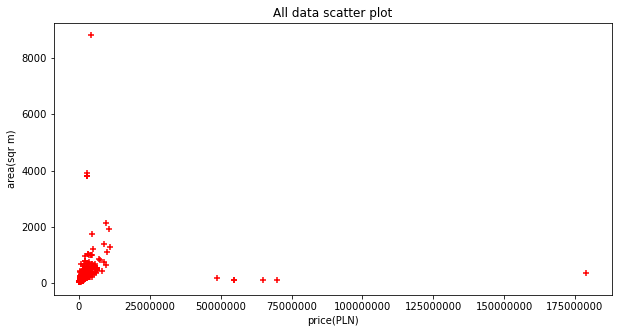

In [265]:
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.xlabel('price(PLN)')
plt.ylabel('area(sqr m)')
plt.title("All data scatter plot")
plt.scatter(df.price,df.area, color='red', marker="+")
plt.ticklabel_format(style='plain', useOffset=False, axis='x')

In [266]:
#filter for price below 25000000
df = df.loc[df["price"] <= 2500000 ]
df['price'].max()

2500000.0

In [267]:
#filter for area below 500 m sqr
df = df.loc[df["area"] <= 500 ]
df['area'].max()

500.0

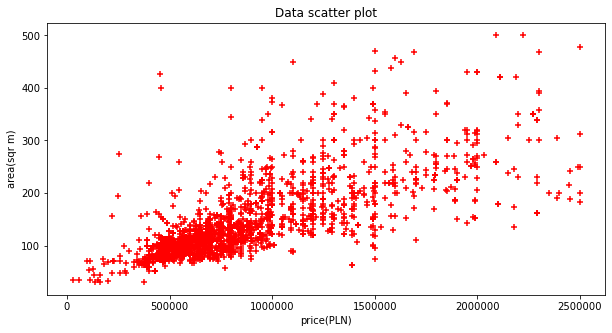

In [268]:
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.ylabel('area(sqr m)')
plt.xlabel('price(PLN)')
plt.title("Data scatter plot")
plt.scatter(df.price,df.area, color='red', marker="+")
plt.ticklabel_format(style='plain', useOffset=False, axis='x')

Text(0.5, 1.0, 'Houses prices normal distribution')

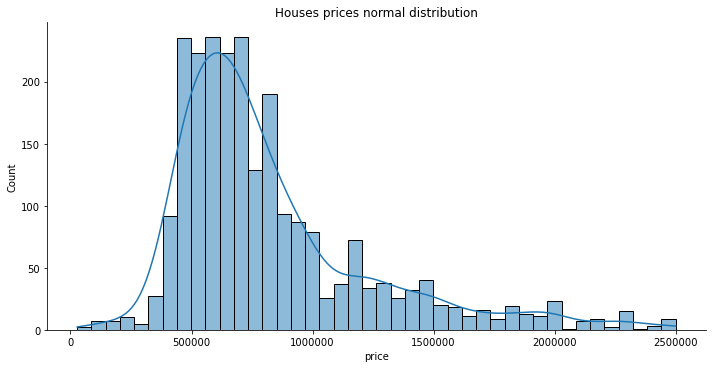

In [269]:
sns.displot(df, x='price', kind='hist',  kde=True, aspect=2)
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
plt.title("Houses prices normal distribution")

Text(0.5, 1.0, 'Houses area normal distribution')

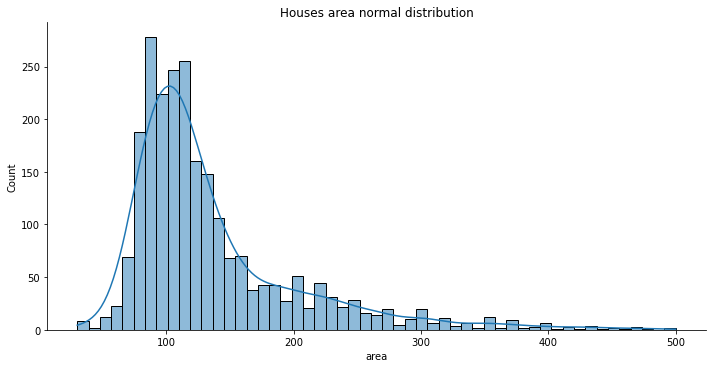

In [270]:
sns.displot(df, x='area', kind='hist',  kde=True, aspect=2)
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
plt.title("Houses area normal distribution")

In [271]:
#Linear regression calculation
x = pd.DataFrame(df['area']).values
y = pd.DataFrame(df['price']).values
print(x)
print(y)

[[170. ]
 [ 52.2]
 [100. ]
 ...
 [250. ]
 [108. ]
 [100. ]]
[[ 980000.]
 [ 429000.]
 [ 549000.]
 ...
 [1700000.]
 [ 634900.]
 [ 389000.]]


In [272]:
reg = linear_model.LinearRegression().fit(x, y)

In [273]:
r_sq = reg.score(x, y)
print(r_sq)

0.5534861997584506


In [274]:
print(reg.intercept_)

[211928.89110436]


In [275]:
print(reg.intercept_)

[211928.89110436]


In [276]:
y_predict = reg.predict(x)
print(y_predict)

[[ 977739.62828893]
 [ 447077.83511044]
 [ 662405.79533057]
 ...
 [1338121.1516699 ]
 [ 698443.94766867]
 [ 662405.79533057]]


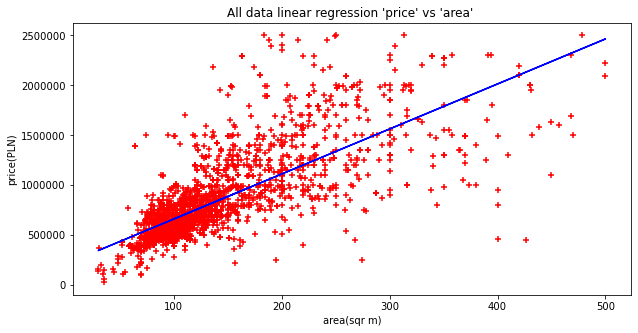

In [277]:
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.xlabel('area(sqr m)')
plt.ylabel('price(PLN)')
plt.title("All data linear regression 'price' vs 'area' ")
plt.scatter(df.area, df.price, color='red', marker="+")
plt.plot(df.area, y_predict, color='blue')
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')

In [278]:
#price prediction for 100m sqr house
y_predict = reg.predict([[100]])
print(y_predict)

[[662405.79533057]]


In [279]:
#price prediction for 300m sqr house
y_predict = reg.predict([[300]])
print(y_predict)

[[1563359.60378301]]


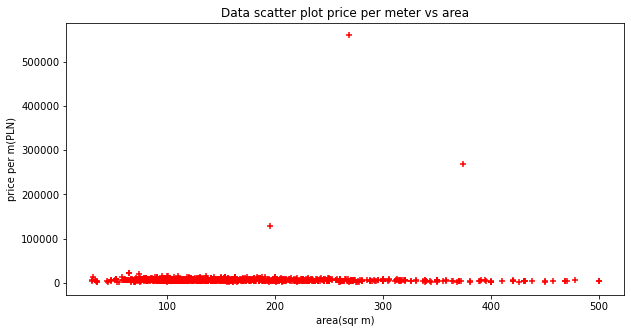

In [280]:
#price per meter sqr vs area
%matplotlib inline
plt.figure(figsize=(10, 5)) 
plt.xlabel('area(sqr m)')
plt.ylabel('price per m(PLN)')

plt.title("Data scatter plot price per meter vs area")
plt.scatter(df.area, df['price per m'], color='red', marker="+")
#plt.plot(df.price, reg.predict(df[['price']]), color='blue')

plt.ticklabel_format(style='plain', useOffset=False, axis='x')

In [281]:
#filter for price per meter sqr below 50000PLN
df_ppm = df.loc[df["price per m"] <= 50000 ]
df_ppm['price per m'].max()

21703

In [282]:
df_ppm['area'].max()

500.0

In [283]:
df_ppm['area'].count()

2370

In [284]:
df_ppm["price per m"].count()

2370

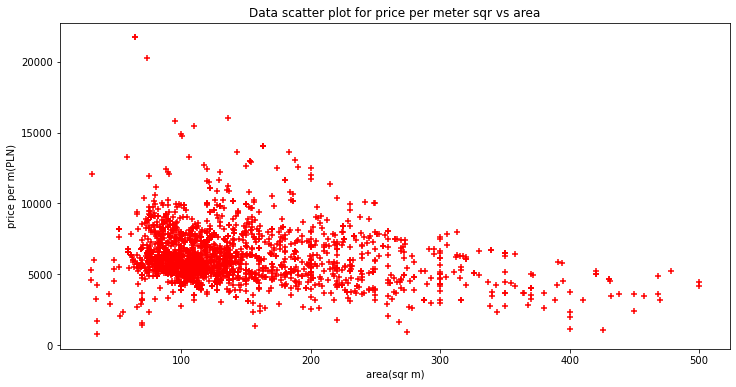

In [285]:
#"price per m" vs "area"
%matplotlib inline
plt.figure(figsize=(12, 6)) 
plt.xlabel('area(sqr m)')
plt.ylabel('price per m(PLN)')
plt.title("Data scatter plot for price per meter sqr vs area")
plt.scatter(df_ppm.area, df_ppm['price per m'], color='red', marker="+")
plt.ticklabel_format(style='plain', useOffset=False, axis='x')

Text(0.5, 1.0, "'Price per  meter sqr' normal distribution")

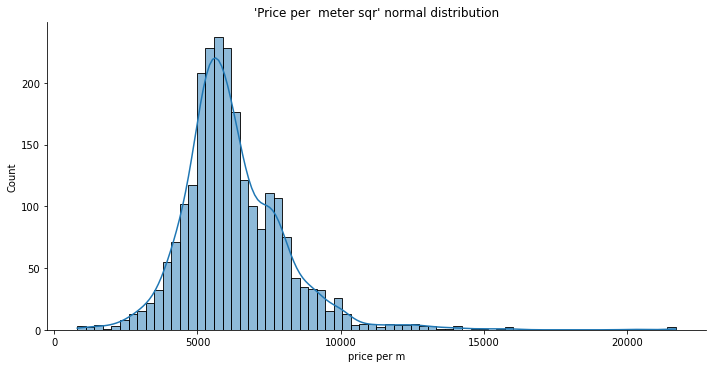

In [286]:
#Price per m sqr normal distribution
sns.displot(df_ppm, x='price per m', kind='hist',  kde=True, aspect=2)
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
plt.title("'Price per  meter sqr' normal distribution")

In [287]:
x_ppm = pd.DataFrame(df_ppm['area']).values
y_ppm = pd.DataFrame(df_ppm['price per m']).values
print(x_ppm)
print(y_ppm)

[[170. ]
 [ 52.2]
 [100. ]
 ...
 [250. ]
 [108. ]
 [100. ]]
[[5765]
 [8218]
 [5490]
 ...
 [6800]
 [5879]
 [3890]]


In [288]:
#linear regression for price per meter sqr
reg_ppm = linear_model.LinearRegression().fit(x_ppm, y_ppm)

In [289]:
r_sq_ppm = reg_ppm.score(x_ppm, y_ppm)
print(r_sq)

0.5534861997584506


In [290]:
print(reg_ppm.intercept_)

[7009.78437051]


In [291]:
print(reg_ppm.intercept_)

[7009.78437051]


In [292]:
y_predict_ppm = reg_ppm.predict(x_ppm)
print(y_predict_ppm)

[[6065.02857428]
 [6719.6887672 ]
 [6454.04566685]
 ...
 [5620.43761135]
 [6409.58657055]
 [6454.04566685]]


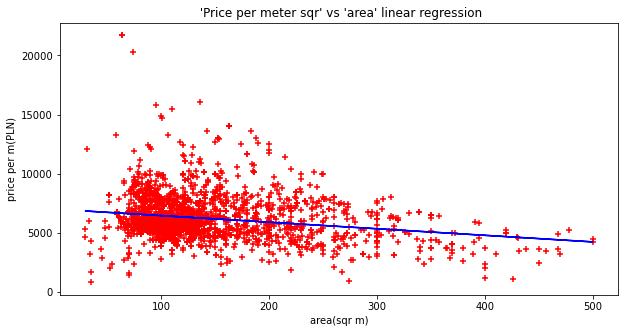

In [293]:
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.xlabel('area(sqr m)')
plt.ylabel('price per m(PLN)')

plt.title(" 'Price per meter sqr' vs 'area' linear regression")
plt.scatter(df_ppm.area, df_ppm['price per m'], color='red', marker="+")
plt.plot(df_ppm.area, y_predict_ppm, color='blue')
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')

In [294]:
#price per m sqr predistion for 100m sqr house
y_predict_ppm = reg_ppm.predict([[100]])
print(y_predict_ppm)

[[6454.04566685]]


In [295]:
#price per m sqr predistion for 500m sqr house
y_predict_ppm = reg_ppm.predict([[500]])
print(y_predict_ppm)

[[4231.09085218]]


In [296]:
#filter for location for Pobiedziska city or type any other location like "Jeżyce", "Luboń", etc.
df_pob = df.loc[df['location'].str.contains("Pobiedziska", case=False)]
df_pob       

,price,price per m,area,location
160,820000.0,7885,104.00,Pobiedziska wielkopolskie
312,499000.0,5781,86.31,ul. Słoneczna Pobiedziska wielkopolskie
314,539000.0,6245,86.31,ul. Słoneczna Pobiedziska wielkopolskie
349,829000.0,8635,96.00,Pobiedziska wielkopolskie
418,1600000.0,10256,156.00,Pobiedziska wielkopolskie
438,485250.0,3408,142.40,ul. por. Sypniewskiego Pobiedziska wielkopolskie
820,899000.0,7399,121.50,Pobiedziska poznański wielkopolskie
856,390000.0,2422,161.00,Pobiedziska wielkopolskie
857,546000.0,5935,92.00,Rzeczna Pobiedziska wielkopolskie
858,1200000.0,6417,187.00,Łagiewniki Pobiedziska wielkopolskie


In [297]:
x_pob = pd.DataFrame(df_pob['area']).values
y_pob = pd.DataFrame(df_pob['price']).values
df_pob['area'].head()

160    104.00
312     86.31
314     86.31
349     96.00
418    156.00
Name: area, dtype: float64

In [298]:
df_pob['price'].head()

160     820000.0
312     499000.0
314     539000.0
349     829000.0
418    1600000.0
Name: price, dtype: float64

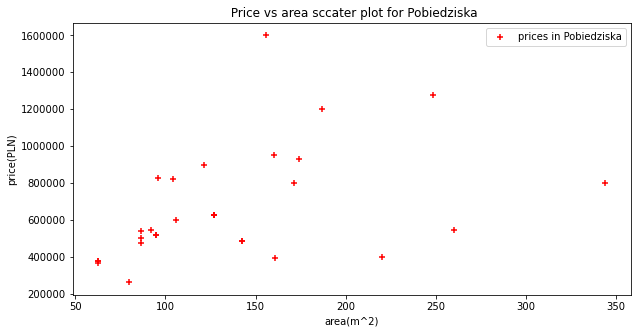

In [299]:
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.xlabel('area(m^2)')
plt.ylabel('price(PLN)')
plt.title(" Price vs area sccater plot for Pobiedziska")
plt.scatter(df_pob.area, df_pob.price, color='red', marker="+", label="prices in Pobiedziska")
plt.ticklabel_format(style='plain', useOffset=False, axis='y') 
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
plt.legend()

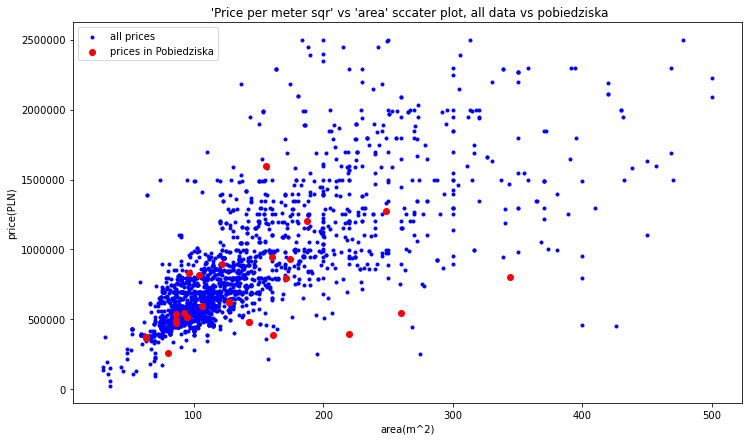

In [300]:
%matplotlib inline
plt.figure(figsize=(12, 7))
plt.xlabel('area(m^2)')
plt.ylabel('price(PLN)')

plt.title(" 'Price per meter sqr' vs 'area' sccater plot, all data vs pobiedziska")
plt.scatter(df.area, df.price, color='blue', marker=".", label="all prices")
plt.scatter(df_pob.area, df_pob.price, color='red', marker="o", label="prices in Pobiedziska")

plt.ticklabel_format(style='plain', useOffset=False, axis='y') 
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
plt.legend()

In [301]:
#House area statistical data for Pobiedziska
area_mean = np.mean(x_pob)
print(f'area mean for Pobiedziska is: {"%.0f" % area_mean}')

area_std = np.std(x_pob)
print(f'area standard deviation for Pobiedziska is: {"%.0f" %  area_std}')

area_median = np.median(x_pob)
print(f'area median for Pobiedziska is: {"%.0f"% area_median}')

area_mode = stats.mode(x_pob)
print(f'area mode for Pobiedziska is: { area_mode}')

area mean for Pobiedziska is: 137
area standard deviation for Pobiedziska is: 64
area median for Pobiedziska is: 127
area mode for Pobiedziska is: ModeResult(mode=array([[127.]]), count=array([[4]]))


In [302]:
#house prices statistical data for Pobiedziska
price_mean = np.mean(y_pob)
print(f'price mean for Pobiedziska is: {"%.0f" % price_mean}')

price_std = np.std(y_pob)
print(f'price standard deviation for Pobiedziska is: {"%.0f" %  price_std}')

price_median = np.median(y_pob)
print(f'price median for Pobiedziska is: {"%.0f"% price_median}')

price_mode = stats.mode(y_pob)
print(f'price mode for Pobiedziska is: { price_mode}')

price mean for Pobiedziska is: 666550
price standard deviation for Pobiedziska is: 295235
price median for Pobiedziska is: 572500
price mode for Pobiedziska is: ModeResult(mode=array([[628000.]]), count=array([[4]]))


In [303]:
#Linear regression for Pobiedziska
reg_pob = linear_model.LinearRegression().fit(x_pob, y_pob)

In [304]:
r_sq_pob = reg_pob.score(x_pob, y_pob)
print(r_sq_pob)

0.17263753223631473


In [305]:
print(reg_pob.intercept_)

[402179.53300776]


In [306]:
print(reg_pob.coef_)

[[1929.26080764]]


In [307]:
y_predict_pob = reg_pob.predict(x_pob)
print(y_predict)

[[1563359.60378301]]


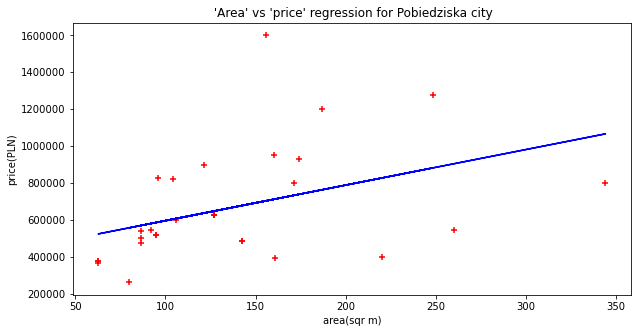

In [308]:
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.xlabel('area(sqr m)')
plt.ylabel('price(PLN)')
plt.title(" 'Area' vs 'price' regression for Pobiedziska city")
plt.scatter(df_pob.area, df_pob.price, color='red', marker="+")
plt.plot(df_pob.area, y_predict_pob, color='blue')
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')

In [309]:
#House price prediciton for 100m sqr
y_predict_pob = reg_pob.predict([[100]])
print(y_predict_pob)

[[595105.61377155]]


In [310]:
#House price prediciton for 200m sqr
y_predict_pob = reg_pob.predict([[200]])
print(y_predict_pob)

[[788031.69453534]]


Text(0.5, 1.0, 'Pobiedziska price normal distribution')

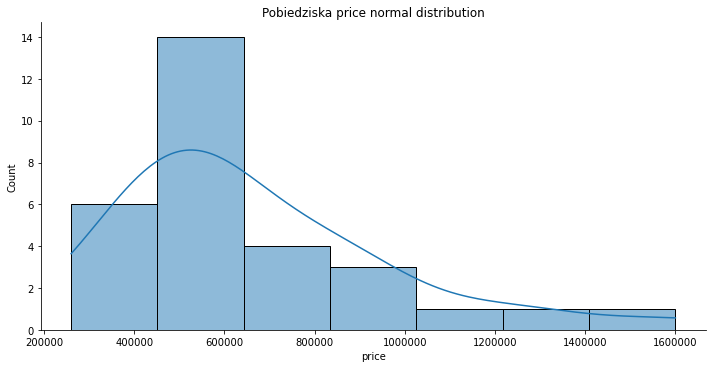

In [311]:
sns.displot(df_pob, x='price', kind='hist', kde=True, aspect=2)
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
plt.title("Pobiedziska price normal distribution")

Text(0.5, 1.0, 'Pobiedziska area normal distribution')

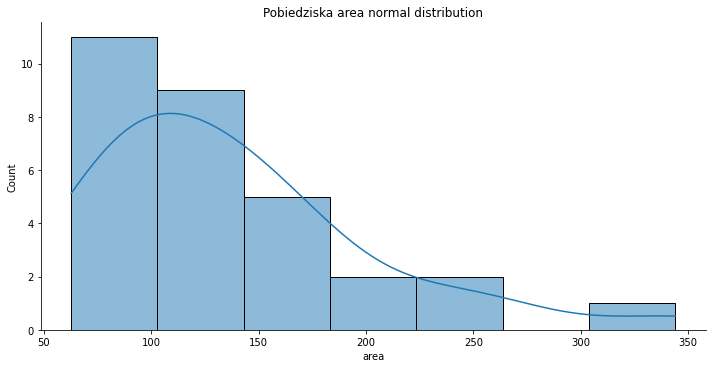

In [312]:
sns.displot(df_pob, x='area', kind='hist',  kde=True, aspect=2)
#{“hist”, “kde”, “ecdf”}
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
plt.title("Pobiedziska area normal distribution")

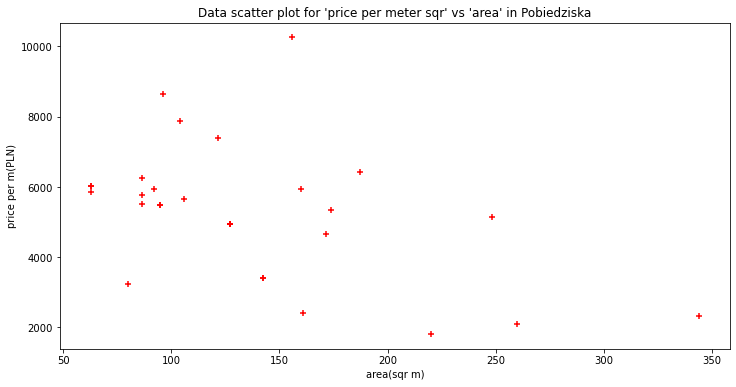

In [313]:
#"price per m" vs "area" for Pobiedziska
%matplotlib inline
plt.figure(figsize=(12, 6)) 
plt.xlabel('area(sqr m)')
plt.ylabel('price per m(PLN)')
plt.title("Data scatter plot for 'price per meter sqr' vs 'area' in Pobiedziska")
plt.scatter(df_pob.area, df_pob['price per m'], color='red', marker="+")
plt.ticklabel_format(style='plain', useOffset=False, axis='x')

In [314]:
x_pob_ppm = pd.DataFrame(df_pob['area']).values
y_pob_ppm = pd.DataFrame(df_pob['price per m']).values
df_pob['area'].head()

160    104.00
312     86.31
314     86.31
349     96.00
418    156.00
Name: area, dtype: float64

In [315]:
reg_pob_ppm = linear_model.LinearRegression().fit(x_pob_ppm, y_pob_ppm)

In [316]:
r_sq_pob_ppm = reg_pob_ppm.score(x_pob_ppm, y_pob_ppm)
print(r_sq_pob_ppm)

0.22268282286884233


In [317]:
print(reg_pob_ppm .intercept_)

[7158.04183521]


In [318]:
print(reg_pob_ppm.coef_)

[[-13.77348723]]


In [319]:
y_predict_pob_ppm = reg_pob_ppm.predict(x_pob_ppm)
print(y_predict)

[[1563359.60378301]]


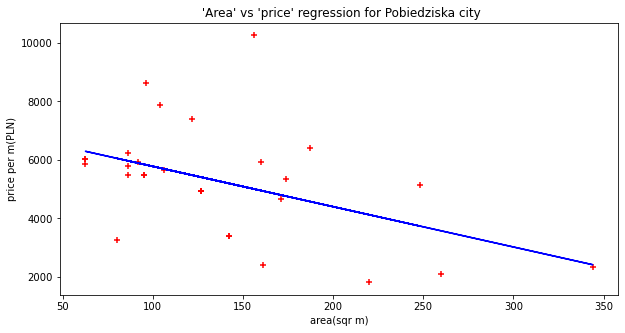

In [320]:
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.xlabel('area(sqr m)')
plt.ylabel('price per m(PLN)')

plt.title(" 'Area' vs 'price' regression for Pobiedziska city")
plt.scatter(df_pob.area, df_pob['price per m'], color='red', marker="+")
plt.plot(df_pob.area, y_predict_pob_ppm, color='blue')
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')

In [321]:
y_predict_pob_ppm = reg_pob_ppm.predict([[100]])
print(y_predict_pob_ppm)

[[5780.69311237]]


In [322]:
y_predict_pob_ppm = reg_pob_ppm.predict([[250]])
print(y_predict_pob_ppm)

[[3714.67002812]]


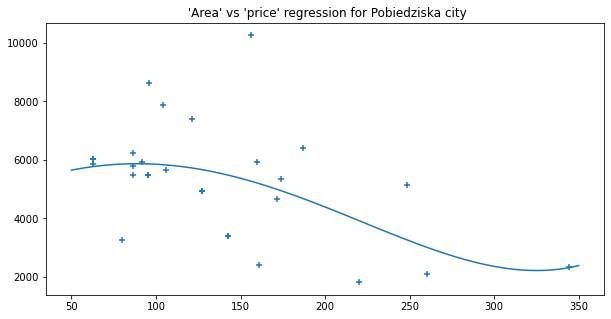

In [323]:
from numpy.polynomial import Polynomial

plt.figure(figsize=(10, 5))

mymodel = Polynomial.fit(df_pob['area'], df_pob['price per m'], 4)

myline = np.linspace(50, 350, 100)

plt.scatter(df_pob['area'], df_pob['price per m'], marker="+")
plt.plot(myline, mymodel(myline))
plt.title(" 'Area' vs 'price' regression for Pobiedziska city")
plt.show()

Text(0.5, 1.0, 'Pobiedziska - price per meter sqr normal distribution')

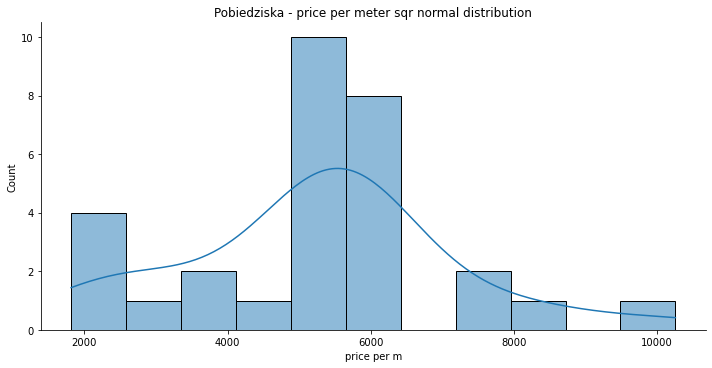

In [324]:
sns.displot(df_pob, x='price per m', kind='hist',  kde=True, aspect=2)
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
plt.title("Pobiedziska - price per meter sqr normal distribution")

In [325]:
#example filter for other locations
df_gr = df.loc[df['location'].str.contains("Grunwald", case=False)]
df_gr  

,price,price per m,area,location
129,804999.0,5963,135.0,Poznań Grunwald Świerczewo
130,765000.0,5100,150.0,Poznań Grunwald
146,765000.0,9745,78.5,Poznań Grunwald
155,790000.0,5448,145.0,Poznań Grunwald Junikowo Piwoniowa
171,1399000.0,8229,170.0,Poznań Grunwald Górczyn ul. Stęszewska
...,...,...,...,...
2471,1140000.0,3800,300.0,Poznań Grunwald Górczyn
2491,990000.0,3722,266.0,Poznań Grunwald Junikowo Cyniowa
2492,1750000.0,5538,316.0,Poznań Grunwald
2493,1590000.0,6285,253.0,Poznań Grunwald
